# Introduction to machine learning

The course notes are available [here](https://carpentries-incubator.github.io/machine-learning-novice-python/).

## Introduction

### Exercise

A) What is the most time consuming aspect of developing a predictive model, according to the authors?

80% of effort in building models is in “preprocessing, merging, customizing, and cleaning”.

B) How have “traditional” predictive models dealt with high numbers of predictor variables, according to the authors?

Traditional modeling approaches have dealt with complexity by choosing a very limited number of variables to consider.

## Supervised vs unsupervised learning

A) We have laboratory test data on patients admitted to a critical care unit and we are trying to identify patients with an emerging, rare disease. There are no labels to indicate which patients have the disease, but we believe that the infected patients will have very distinct characteristics. Do we look for a supervised or unsupervised machine learning approach?

The prediction targets are not labelled, so an unsupervised learning approach would be appropriate. Our hope is that we will see a unique cluster in the data that pertains to the emerging disease.

B) We would like to predict whether or not patients will respond to a new drug that is under development based on several genetic markers. We have a large corpus of clinical trial data that includes both genetic markers of patients and their response the new drug. Do we use a supervised or unsupervised approach?

We have both genetic markers and known outcomes, so in this case supervised learning is appropriate.

## Data preparation

### Loading the data

In [1]:
import pandas as pd

# load the data
cohort = pd.read_csv('./eicu_cohort.csv')
cohort.head()

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight
0,Male,45.0,116.0,3.0778,41,46,ALIVE,109.0,154.0,1.01,36.20,41.0,10.0,178.0
1,Male,57.0,NaN,7.6736,26,31,ALIVE,106.0,46.0,-1.00,36.30,6.0,10.1,172.7
2,Female,59.0,66.6,15.0778,56,61,ALIVE,134.0,172.0,1.03,34.80,32.0,25.5,170.2
3,Male,63.0,71.9,1.3201,77,88,EXPIRED,133.0,40.0,4.30,32.60,39.0,12.6,167.6
4,Male,67.0,104.8,1.5257,75,88,EXPIRED,31.0,133.0,0.70,36.44,31.0,11.3,182.9


## Knowing the data

Run the line below otherwise you get a lot of `FutureWarning` messages from `tableone` when using Python 3.11.

In [2]:
# Disable FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# !pip install tableone
from tableone import tableone

# rename columns
rename = {"unabridgedhosplos":"length of stay",
          "meanbp": "mean blood pressure",
          "wbc": "white cell count"}

# view summary characteristics
t1 = tableone(cohort, groupby="actualhospitalmortality", rename=rename)
t1

# Output to LaTeX
# print(t1.tabulate(tablefmt = "latex"))

Grouped by actualhospitalmortality                                          
                                                                   Missing       Overall         ALIVE       EXPIRED
n                                                                                    235           195            40
gender, n (%)                   Female                                   0    116 (49.4)    101 (51.8)     15 (37.5)
                                Male                                          118 (50.2)     94 (48.2)     24 (60.0)
                                Unknown                                          1 (0.4)                     1 (2.5)
age, mean (SD)                                                           9   61.9 (15.5)   60.5 (15.8)   69.3 (11.5)
admissionweight, mean (SD)                                               5   87.6 (28.0)   88.6 (28.8)   82.3 (23.3)
length of stay, mean (SD)                                                0     9.2 (8.6)     9.6 (7.5)    6.9 (12.5)
acutephysiologyscore, mean (SD)                                          0   59.9 (28.1)   54.5 (23.1)   86.7 (34.7)
apachescore, mean (SD)                                                   0   71.2 (30.3)   64.6 (24.5)  103.5 (34.9)
heartrate, mean (SD)                                                     0  108.7 (33.1)  107.9 (30.6)  112.9 (43.2)
mean blood pressure, mean (SD)                                           0   93.2 (47.0)   92.1 (45.4)   98.6 (54.5)
creatinine, mean (SD)                                                    0     1.0 (1.7)     0.9 (1.7)     1.7 (1.6)
temperature, mean (SD)                                                   0    35.2 (6.5)    36.1 (3.9)   31.2 (12.4)
respiratoryrate, mean (SD)                                               0   30.7 (15.2)   29.9 (15.1)   34.3 (15.6)
white cell count, mean (SD)                                              0    10.5 (8.4)    10.7 (8.2)     9.7 (9.7)
admissionheight, mean (SD)                                               2  168.0 (12.8)  167.7 (13.4)   169.4 (9.1)

### Exercise

A) What is the approximate percent mortality in the eICU cohort?

Approximately 17% (40/235)

B) Which variables appear noticeably different in the “Alive” and “Expired” groups?

Several variables differ, including age, length of stay, acute physiology score, heart rate, etc.

C) How does the in-hospital mortality differ between the eICU cohort and the ones in Rajkomar et al?

The Rajkomar et al dataset has significantly lower in-hospital mortality (~2% vs 17%).

## Encoding

In [75]:
# check current type
print(cohort.dtypes)

gender                          object
age                            float64
admissionweight                float64
unabridgedhosplos              float64
acutephysiologyscore             int64
apachescore                      int64
actualhospitalmortality         object
heartrate                      float64
meanbp                         float64
creatinine                     float64
temperature                    float64
respiratoryrate                float64
wbc                            float64
admissionheight                float64
actualhospitalmortality_enc      int64
dtype: object


In [76]:
# convert to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality']  = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

# add the encoded value to a new column
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

,actualhospitalmortality_enc,actualhospitalmortality
0,0,ALIVE
1,0,ALIVE
2,0,ALIVE
3,0,ALIVE
4,0,ALIVE


In [5]:
# convert to a categorical type
cohort['gender'] = pd.Categorical(cohort['gender'])
cohort['gender'] = cohort['gender'].cat.codes

### Partitioning

A split of ~70% training, 30% test is common.

In [6]:
from sklearn.model_selection import train_test_split

x = cohort.drop('actualhospitalmortality', axis=1)
y = cohort['actualhospitalmortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

### Missing data

In [7]:
# impute missing values from the training set
x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

### Normalisation

In [8]:
# Define the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Alternative is zero mean, unit variance
# Subtract mean, divide by standard deviation
# from sklearn.preprocessing import StandardScaler

# fit the scaler on the training dataset
scaler.fit(x_train)

# scale the training set
x_train = scaler.transform(x_train)

# scale the test set
x_test = scaler.transform(x_test)

## Learning

### Loss function

Text(0.5, 1.0, 'Prediction error')

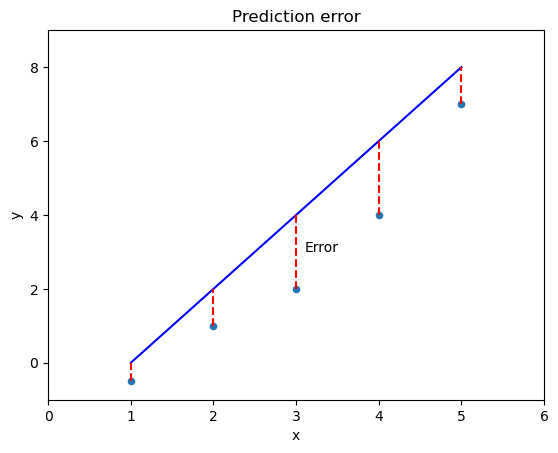

In [9]:
import pandas as pd
import matplotlib

# Create sample labelled data
data = {'x': [1, 2, 3, 4, 5], 'y': [-0.5, 1, 2, 4, 7]}
df = pd.DataFrame(data)

# Add predictions
df['y_hat'] = [0, 2, 4, 6, 8]

# plot the data
ax = df.plot(x='x', y='y', kind='scatter', xlim=[0,6], ylim=[-1,9])

# plot approx line of best fit
ax.plot(df['x'], df['y_hat'], color='blue');

# plot error
ax.vlines(x=df['x'], ymin=df['y'], ymax=df['y_hat'], color='red', linestyle='dashed')
ax.text(x=3.1, y=3, s='Error')
ax.set_title('Prediction error')

In [10]:
import numpy as np

def loss(y, y_hat):
    """
    Loss function (mean squared error).

    Args:
        y (numpy array): The known target values.
        y_hat (numpy array): The predicted values.

    Returns:
        numpy float: The mean squared error.
    """
    distances = y - y_hat
    squared_distances = np.square(distances)
    return np.mean(squared_distances)


### Minimising the error

Text(0, 0.5, 'Loss (squared error)')

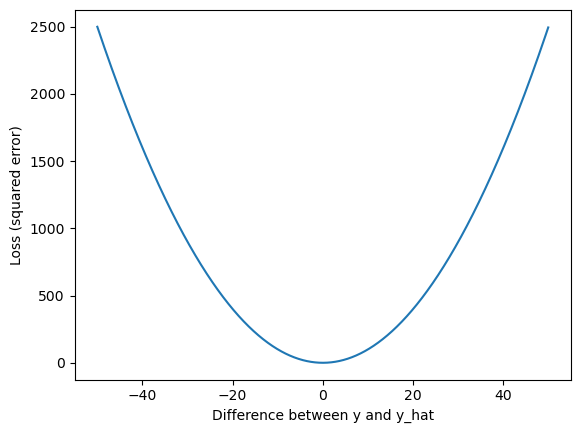

In [11]:
import matplotlib.pyplot as plt

x = np.arange(-50, 50, 0.05)
y = np.square(x)

plt.plot(x, y)
plt.xlabel('Difference between y and y_hat')
plt.ylabel('Loss (squared error)')


## Modelling

### Regression vs classification

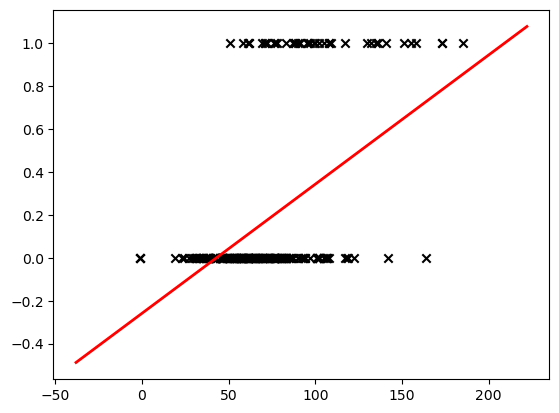

In [12]:
# import the regression model
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# use a single feature (apache score)
# note: remove the reshape if fitting to >1 input variable
X = cohort.apachescore.values.reshape(-1, 1)
y = cohort.actualhospitalmortality_enc.values

# fit the model to our data
reg = reg.fit(X, y)

# get the y values
buffer = 0.2*max(X)
X_fit = np.linspace(min(X) - buffer, max(X) + buffer, num=50)
y_fit = reg.predict(X_fit)

# plot
plt.scatter(X, y,  color='black', marker = 'x')
plt.plot(X_fit, y_fit, color='red', linewidth=2)
plt.show()

### Sigmoid function

$$f(x) = \frac{1}{(1 +e^{-x})}$$

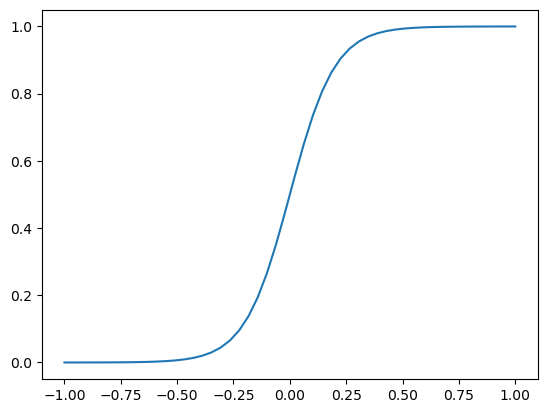

In [13]:
def sigmoid(x, k=0.1):
    """
    Sigmoid function. 
    Adjust k to set slope.
    """
    s = 1 / (1 + np.exp(-x / k)) 
    return s

# set range of values for x
x = np.linspace(-1, 1, 50)

plt.plot(x, sigmoid(x))
plt.show()

### Training (or fitting) the model

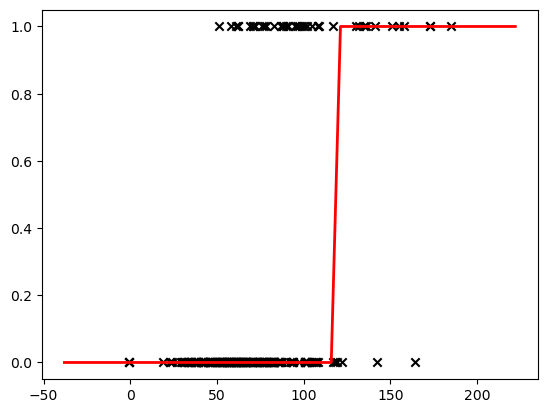

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

# use a single feature (apache score)
# note: remove the reshape if fitting to >1 input variable
X = cohort.apachescore.values.reshape(-1, 1)
y = cohort.actualhospitalmortality_enc.values

# fit the model to our data
reg = reg.fit(X, y)

# get the y values
buffer = 0.2*max(X)
X_fit = np.linspace(min(X) - buffer, max(X) + buffer, num=50)
y_fit = reg.predict(X_fit)

# plot
plt.scatter(X, y,  color='black', marker = 'x')
plt.plot(X_fit, y_fit, color='red', linewidth=2)
plt.show()

### Decision boundary

In [15]:
x = [[90]]
outcome = reg.predict(x)
probs = reg.predict_proba(x)[0]
print(f'For x={x[0][0]}, we predict an outcome of "{outcome[0]}".\n'
      f'Class probabilities (0, 1): {round(probs[0],2), round(probs[1],2)}.')

For x=90, we predict an outcome of "0".
Class probabilities (0, 1): (0.77, 0.23).


## Validation

$$Accuracy = \frac{Correct predictions}{All predictions}$$

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# convert outcome to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

# add the encoded value to a new column
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

# define features and outcome
features = ['apachescore']
outcome = ['actualhospitalmortality_enc']

# partition data into training and test sets
X = cohort[features]
y = cohort[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.ravel()

# train model
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

# generate predictions
y_hat_train = reg.predict(x_train)
y_hat_test = reg.predict(x_test)

#  accuracy on training set
acc_train = np.mean(y_hat_train == y_train)
print(f'Accuracy on training set: {acc_train:.2f}')

#  accuracy on test set
acc_test = np.mean(y_hat_test == y_test)
print(f'Accuracy on test set: {acc_test:.2f}')

Accuracy on training set: 0.86
Accuracy on test set: 0.82


### K-fold cross validation

In [17]:
from numpy import mean, std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# define dataset
X = x_train
y = y_train

# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Cross-validation accuracy, mean (std): %.2f (%.2f)' % (mean(scores)*100, std(scores)*100))

Cross-validation accuracy, mean (std): 81.53 (3.31)


## Evaluation

### Evaluating a classification task

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# convert outcome to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

# add the encoded value to a new column
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

# define features and outcome
features = ['apachescore']
outcome = ['actualhospitalmortality_enc']

# partition data into training and test sets
X = cohort[features]
y = cohort[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state =  42)

# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.ravel()

# train model
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

# generate predictions
y_hat_test = reg.predict(x_test)
y_hat_test_proba = reg.predict_proba(x_test)

In [19]:
probs = y_hat_test_proba[:,1][:12]
rounded_probs = [round(x,2) for x in probs]
print(rounded_probs)

[0.09, 0.11, 0.23, 0.21, 0.23, 0.21, 0.19, 0.03, 0.2, 0.67, 0.54, 0.72]


In [20]:
print(y_hat_test[:12])

[0 0 0 0 0 0 0 0 0 1 1 1]


### Confusion matrices

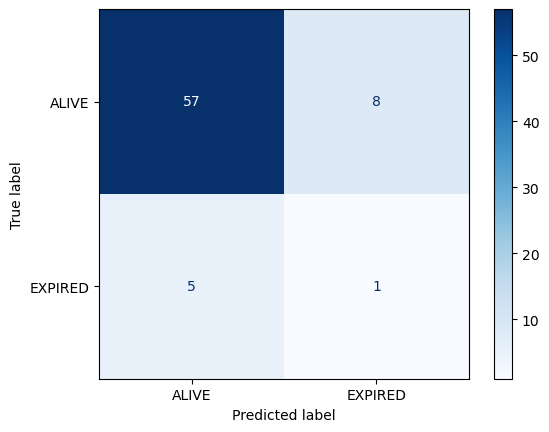

In [21]:
# import the metrics class
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_hat_test)

class_names=cohort['actualhospitalmortality'].cat.categories
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    reg, x_test, y_test, display_labels=class_names,
    cmap=plt.cm.Blues)

plt.show()


### Accuracy

$$ Accuracy=\frac{TP+TN}{TP+TN+FP+FN} $$

In [22]:
acc = metrics.accuracy_score(y_test, y_hat_test)
print(f"Accuracy (model) = {acc:.2f}")

Accuracy (model) = 0.82


In [23]:
zeros = np.zeros(len(y_test))
acc = metrics.accuracy_score(y_test, zeros)
print(f"Accuracy (zeros) = {acc:.2f}")

Accuracy (zeros) = 0.92


### Sensitivity (A.K.A “Recall” and “True Positive Rate”)

$$ Sensitivity=Recall=\frac{TP}{TP+FN} $$

### Specificity (A.K.A “True Negative Rate”)

$$ Specificity=\frac{TN}{FP+TN} $$

### Receiver-Operator Characteristic

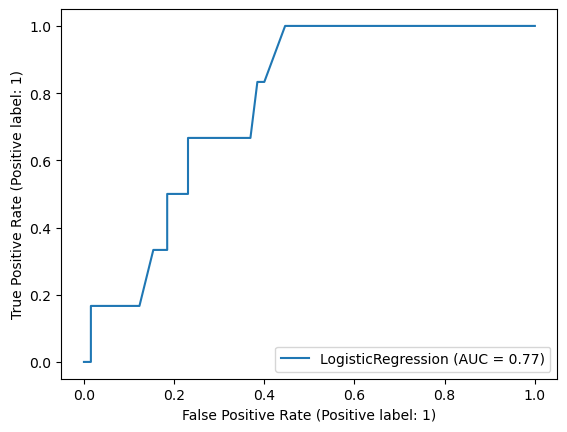

In [24]:
# metrics.plot_roc_curve(reg, x_test, y_test)
metrics.RocCurveDisplay.from_estimator(reg, x_test, y_test)


## Bootstrapping

### Bootstraping

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# convert outcome to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

# add the encoded value to a new column
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

# define features and outcome
features = ['apachescore']
outcome = ['actualhospitalmortality_enc']

# partition data into training and test sets
X = cohort[features]
y = cohort[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.ravel()

# train model
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(x_train, y_train, replace=True)
    # make predictions
    y_hat = reg.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

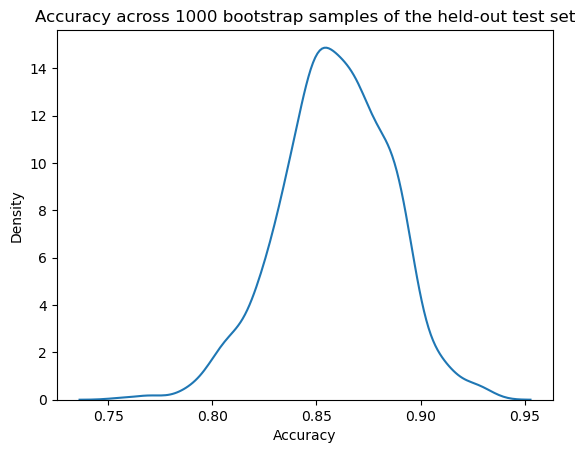

In [26]:
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

### Percentile method

In [27]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.86 with a 95% a confidence interval of [0.80,0.91].


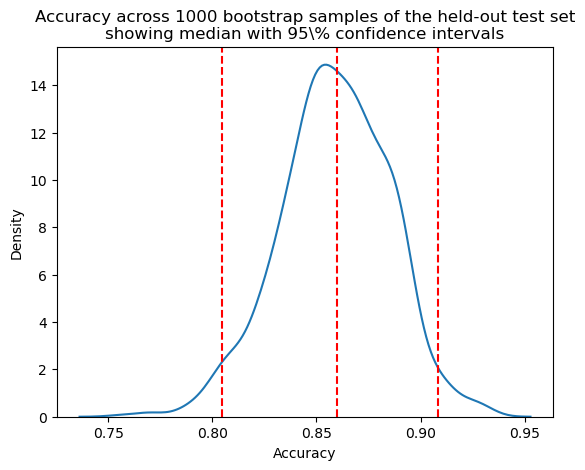

In [28]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

## Data leakage

All text

# Responsible machine learning

Course notes are [here](https://carpentries-incubator.github.io/machine-learning-responsible-python/).

### Setup

This will have to be done as it is not included in this repository

1. Create a subfolder called data.
2. Download eicu_v2_0_1.sqlite3.gz from the Files section of the [project page](https://physionet.org/content/eicu-crd-demo/2.0.1/) (you have to click in the `sqlite` directory).
3. Move the downloaded file to ml-responsible/data.
4. Unzip the file.

eICU Collaborative Research Database Demo was derived from:
[eICU Collaborative Research Database v2.0](https://physionet.org/content/eicu-crd/2.0/).

### Introduction

### Potential harm

The Alan Turing Institute [Understanding artificial intelligence ethics and safety](https://www.turing.ac.uk/sites/default/files/2019-08/understanding_artificial_intelligence_ethics_and_safety.pdf) document (97 pages).

#### Exercise

Take a look at the table on pages 5-6 of the Turing Report. What categories of harm are highlighted?

* Bias and Discrimination
* Denial of Individual Autonomy, Recourse, and Rights
* Non-transparent, Unexplainable, or Unjustifiable Outcomes
* Invasions of Privacy
* Isolation and Disintegration of Social Connection
* Unreliable, Unsafe, or Poor-Quality Outcomes

### Need for oversight

An [ACM 2018 statement](https://web.archive.org/web/20200101022756/https://acm-fca.org/2018/03/29/negativeimpacts/) also given as arxiv [paper](https://arxiv.org/pdf/2112.09544.pdf).

#### Exercise

Take a few moments to read the ACM statement.

A) What are some of the negative impacts of research reported in the article?

Points include: Disruption of careers; Generated audio and video might threaten democracy; Decline in privacy rights; Spread of false information, conspiracy theories, and propaganda.

B) What “small change” do the authors suggest could have a big impact?

“Peer reviewers should require that papers and proposals rigorously consider all reasonable broader impacts, both positive and negative.” Where projects were likely to have a net negative impact, the statement suggests that authors “be encouraged to discuss complementary technologies, policy, or other interventions that could mitigate the negative broader impacts”.

## Impact statements

An [analysis of impact statements](https://arxiv.org/pdf/2105.04760.pdf),

#### Exercise

Take a look at Section 5.1.2 of the analysis on Types of Impacts (beginning page 5).

What are some of the concerns that were raised in the impact statements?

Concerns raised in the impact statements included:

* Privacy: impact around personal data and surveillance.
* Labor: impact on employment and productivity.
* Environment: impact on the environment, including the carbon footprint of training models.
* Media: impact in the media, particularly around fake news and misinformation.
* Bias: impact in terms of fairness and discrimination.
* Reliability: impact of models that failed to meet expectations.
* Interpretability: impact of the opaqueness of models and the “black box problem”.

## Regulation

Proposed [EU regulation](https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=CELEX:52021PC0206&from=EN).

## Tasks

# Tree models

Course notes are [here](https://carpentries-incubator.github.io/machine-learning-trees-python/).

### Setup

Download the [eicu_cohort_trees.csv](https://carpentries-incubator.github.io/machine-learning-trees-python/data/eicu_cohort_trees.csv) file and place with the other data files.


### Loading the patient cohort

In [52]:
# import libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# load the data
cohort = pd.read_csv('./eicu_cohort_trees.csv')

# Display the first 5 rows of the data
cohort.head()

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight
0,Female,48,86.4,27.5583,44,49,ALIVE,102.0,54.0,1.16,36.9,39.0,6.1,177.8
1,Female,59,66.6,15.0778,56,61,ALIVE,134.0,172.0,1.03,34.8,32.0,25.5,170.2
2,Male,31,66.8,2.7326,45,45,ALIVE,138.0,71.0,2.35,37.2,34.0,21.4,188.0
3,Female,51,77.1,0.1986,19,24,ALIVE,122.0,73.0,-1.00,36.8,26.0,-1.0,160.0
4,Female,48,63.4,1.7285,25,30,ALIVE,130.0,68.0,1.10,-1.0,29.0,7.6,172.7


### Preparing for data analysis

In [53]:
# Encode the categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cohort['actualhospitalmortality_enc'] = encoder.fit_transform(cohort['actualhospitalmortality'])

In [54]:
# Handle the deidentified ages
cohort['age'] = pd.to_numeric(cohort['age'], downcast='integer', errors='coerce')
cohort['age'] = cohort['age'].fillna(value=91.5)

In [55]:
# Disable FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [56]:
from tableone import tableone

t1 = tableone(cohort, groupby='actualhospitalmortality')
#print(t1.tabulate(tablefmt = "github"))
print(t1.tabulate(tablefmt = "fancy_grid"))

╒════════════════════════════════════╤═════════╤═══════════╤══════════════╤══════════════╤══════════════╕
│                                    │         │ Missing   │ Overall      │ ALIVE        │ EXPIRED      │
╞════════════════════════════════════╪═════════╪═══════════╪══════════════╪══════════════╪══════════════╡
│ n                                  │         │           │ 536          │ 488          │ 48           │
├────────────────────────────────────┼─────────┼───────────┼──────────────┼──────────────┼──────────────┤
│ gender, n (%)                      │ Female  │ 0         │ 305 (56.9)   │ 281 (57.6)   │ 24 (50.0)    │
├────────────────────────────────────┼─────────┼───────────┼──────────────┼──────────────┼──────────────┤
│                                    │ Male    │           │ 230 (42.9)   │ 207 (42.4)   │ 23 (47.9)    │
├────────────────────────────────────┼─────────┼───────────┼──────────────┼──────────────┼──────────────┤
│                                    │ Unknown

### Exercise

a) What proportion of patients survived their hospital stay?

488 (ALIVE)/ 536 (overall) ~ 91%

b) What is the “apachescore” variable? Hint, see the [Wikipeda entry for the Apachescore](https://en.wikipedia.org/wiki/APACHE_II).

score applied within 24 hours of admission of a patient to an intensive care unit (ICU): an integer score from 0 to 71 is computed based on several measurements; higher scores correspond to more severe disease and a higher risk of death.

c) What is the average age of patients?

Mean is 63.4 but median is a better measure.

In [57]:
cohort['age'].median()

64.0

### Creating training and test sets

In [58]:
from sklearn.model_selection import train_test_split

features = ['age','acutephysiologyscore']
outcome = 'actualhospitalmortality_enc'

x = cohort[features]
y = cohort[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

### Exercise

a) Why did we split our data into training and test sets?

b) What is the effect of setting a random state in the splotting algorithm?

## Decision trees

### The simplest tree

Classification and Regression Trees (CART)

In [59]:
from sklearn import tree

# specify max_depth=1 so we train a stump, i.e. a tree with only 1 split
mdl = tree.DecisionTreeClassifier(max_depth=1)

# fit the model to the data - trying to predict y from X
mdl = mdl.fit(x_train.values, y_train.values)

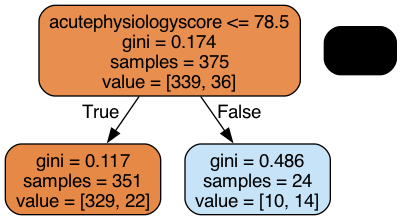

In [60]:
import glowyr
from IPython.display import display, Image

graph = glowyr.create_graph(mdl, feature_names=features)
img = Image(graph.create_png())
display(img)

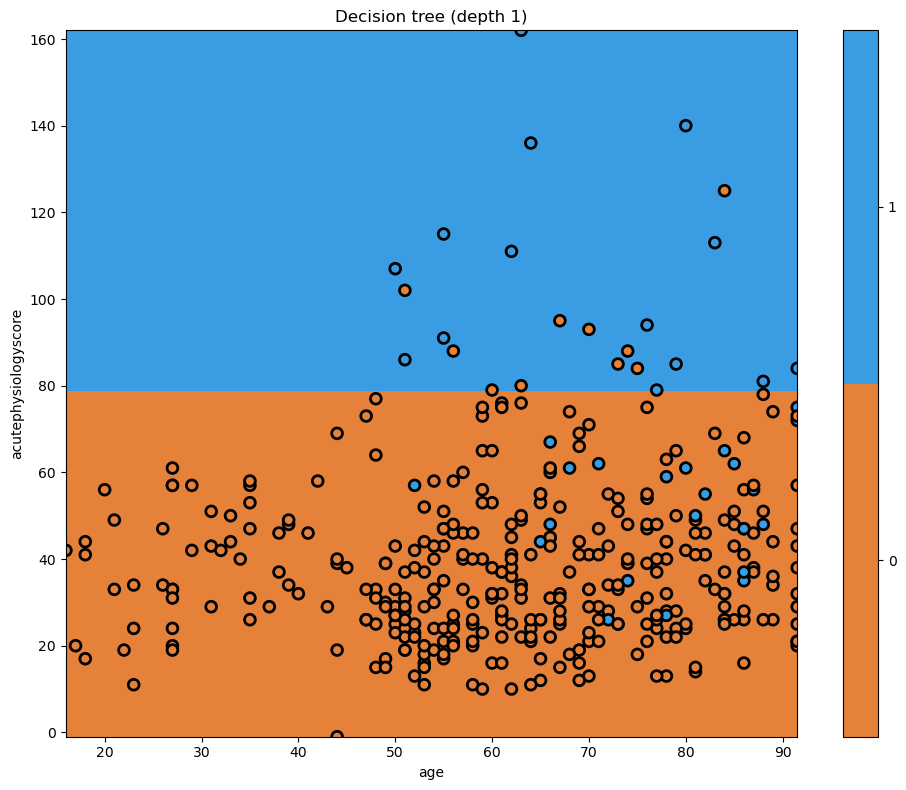

In [61]:
import matplotlib.pyplot as plt

# look at the regions in a 2d plot
# based on scikit-learn tutorial plot_iris.html
plt.figure(figsize=[10,8])
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title="Decision tree (depth 1)")

### Variance

#### Increasing the depth of the tree

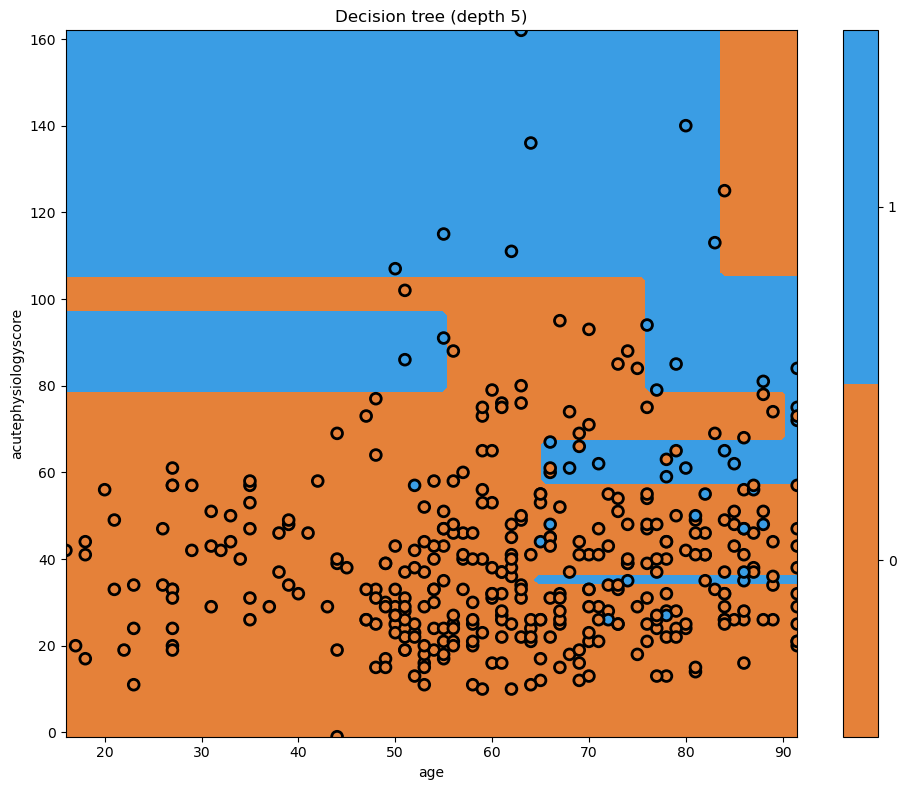

In [62]:
# train model
mdl = tree.DecisionTreeClassifier(max_depth=5)
mdl = mdl.fit(x_train.values, y_train.values)

# plot tree
plt.figure(figsize=[10,8])
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title="Decision tree (depth 5)")

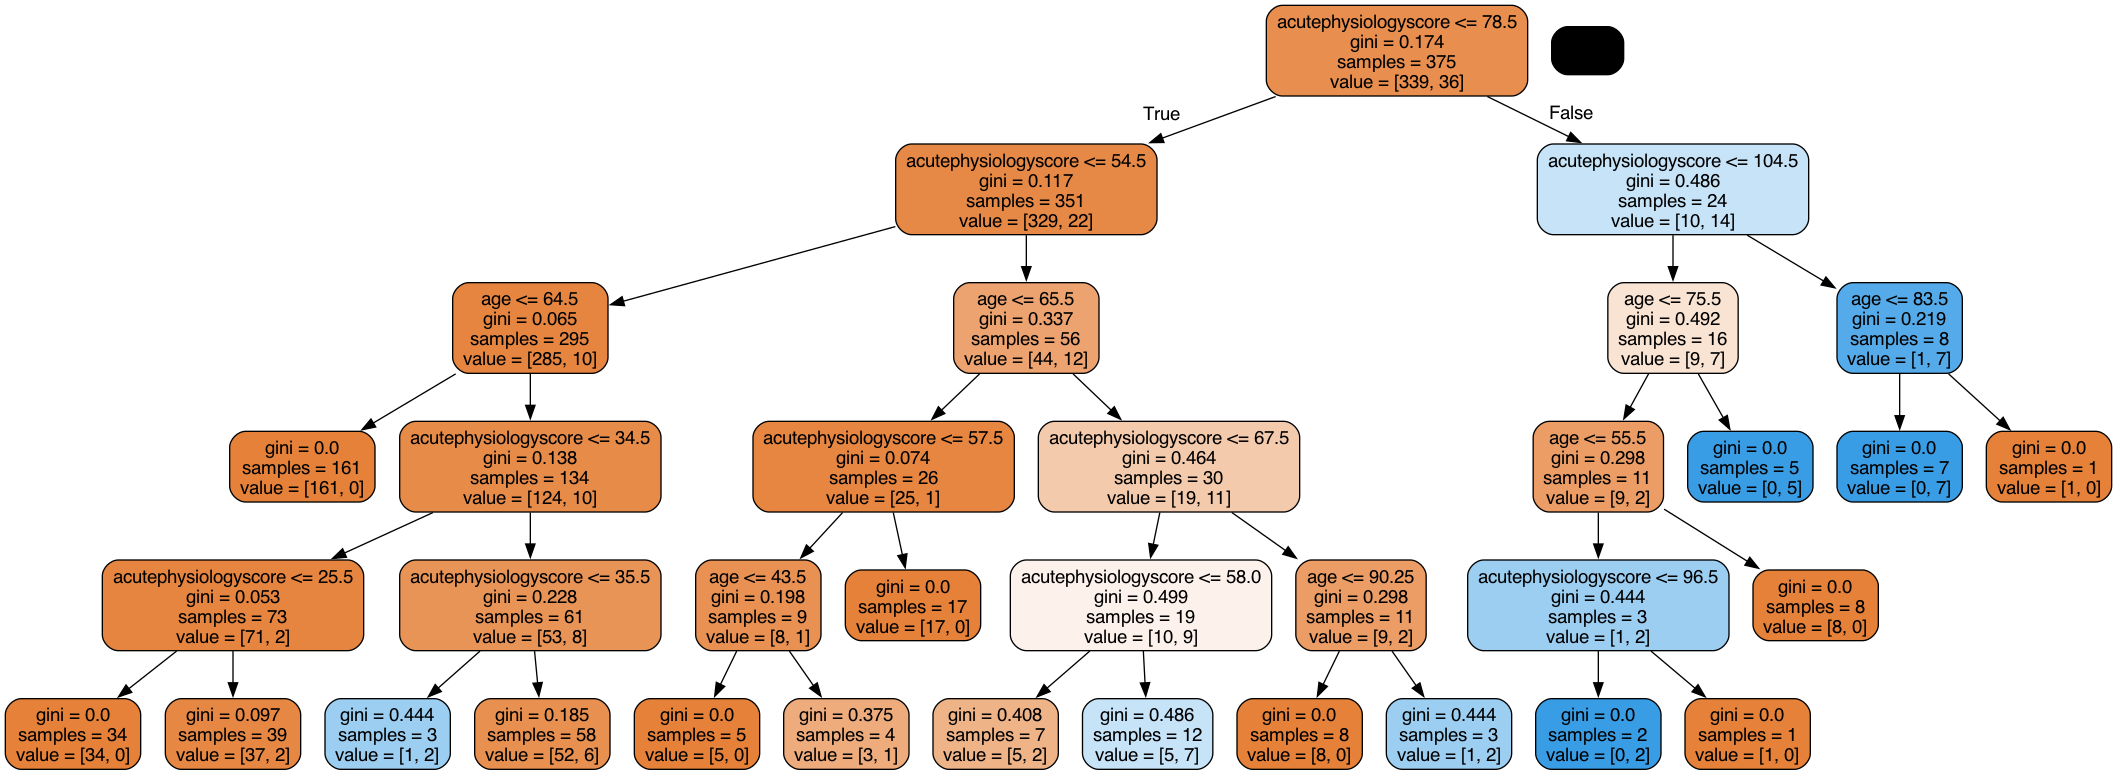

In [63]:
graph = glowyr.create_graph(mdl,feature_names=features)
Image(graph.create_png())

#### Overfitting

a) Consider a patient aged 45 years with an acute physiology score of 100. Using the image of the tree, work through the nodes until your can make a prediction. What outcome does your model predict?

gini = 0.0, samples = 1; value = [1, 2]
"acutePhysiologyScore <= 78.5? No. ->
acutePhysiologyScore <= 104.5? Yes. ->
age <= 76.5? Yes.  ->
age <= 55.5. Yes. ->
acutePhysiologyScore <= 96.5? No."

b) What is the gini impurity of the final node, and why?

0, no mixing

c) Does the decision that led to this final node seem sensible to you? Why?

"Having an entire rule based upon this one observation seems silly, but it is perfectly logical at the moment. The only objective the algorithm cares about is minimizing the gini impurity."

###  Pruning

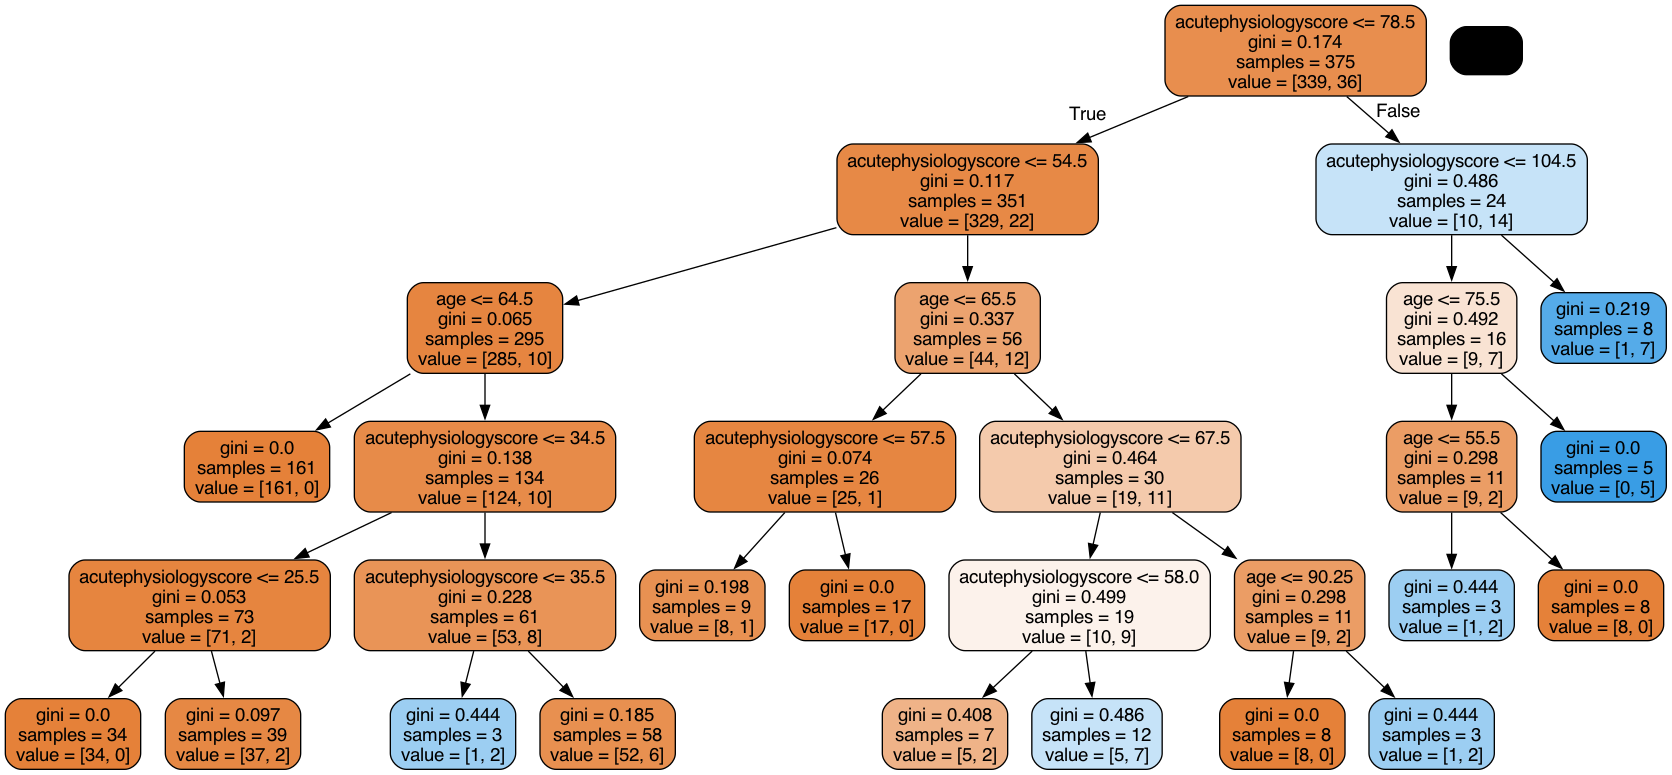

In [64]:
mdl = glowyr.prune(mdl, min_samples_leaf = 10)
graph = glowyr.create_graph(mdl, feature_names=features)
Image(graph.create_png())

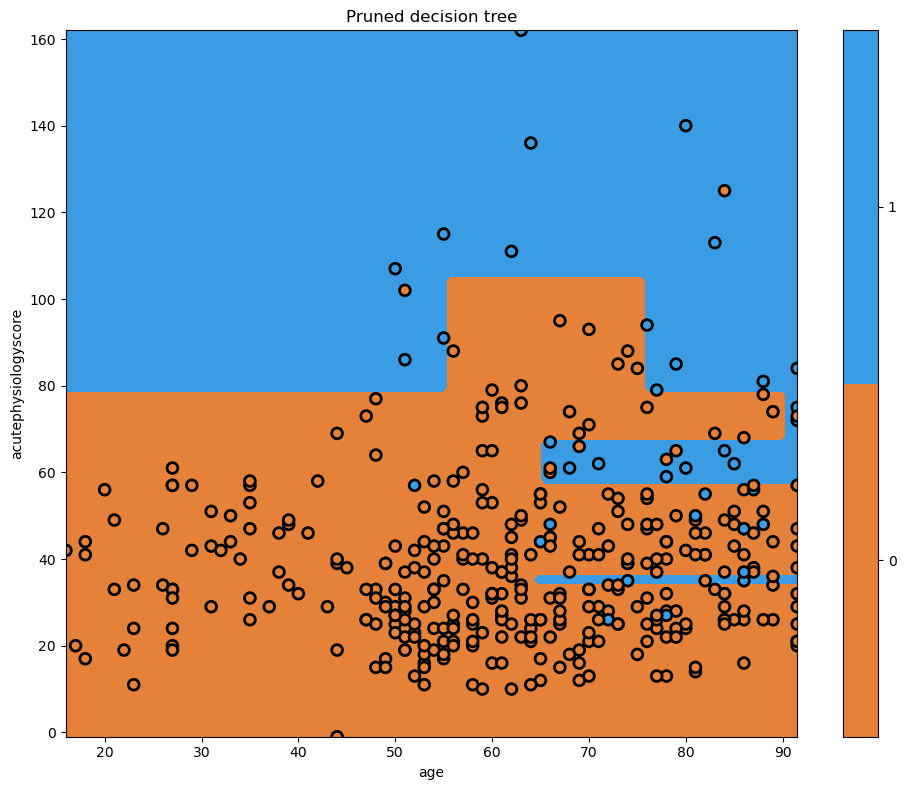

In [65]:
# Decision surface for this tree
plt.figure(figsize=[10,8])
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title="Pruned decision tree")

### Decision trees have high “variance”

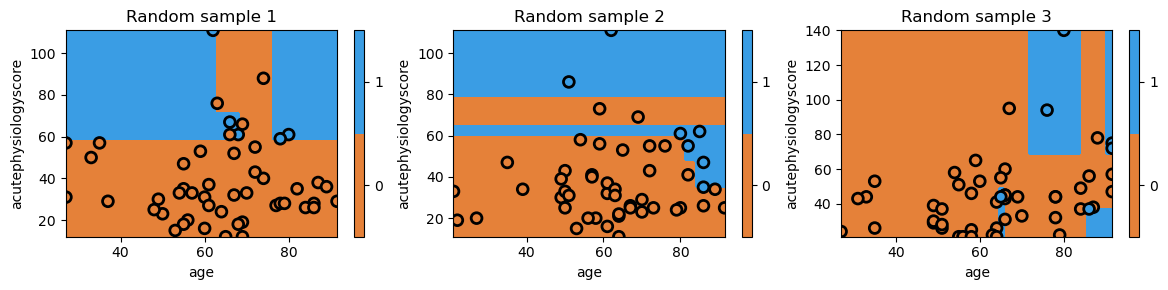

In [66]:
# slicing the data
import numpy as np
np.random.seed(123)

fig = plt.figure(figsize=[12,3])

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)

    # generate indices in a random order
    idx = np.random.permutation(x_train.shape[0])
    
    # only use the first 50
    idx = idx[:50]
    x_temp = x_train.iloc[idx]
    y_temp = y_train.values[idx]
    
    # initialize the model
    mdl = tree.DecisionTreeClassifier(max_depth=5)
    
    # train the model using the dataset
    mdl = mdl.fit(x_temp.values, y_temp)
    txt = f'Random sample {i+1}'
    glowyr.plot_model_pred_2d(mdl, x_temp, y_temp, title=txt)

### Exercise

a) Why are decision trees considered have high variance?

Minor changes in the data used to train decision trees can lead to very different model performance.

b) An “ensemble” is the name used for a machine learning model that aggregates the decisions of multiple sub-models. Why might creating ensembles of decision trees be a good idea?

By combining many of instances of “high variance” classifiers (decision trees), we can end up with a single classifier with low variance.

## Boosting

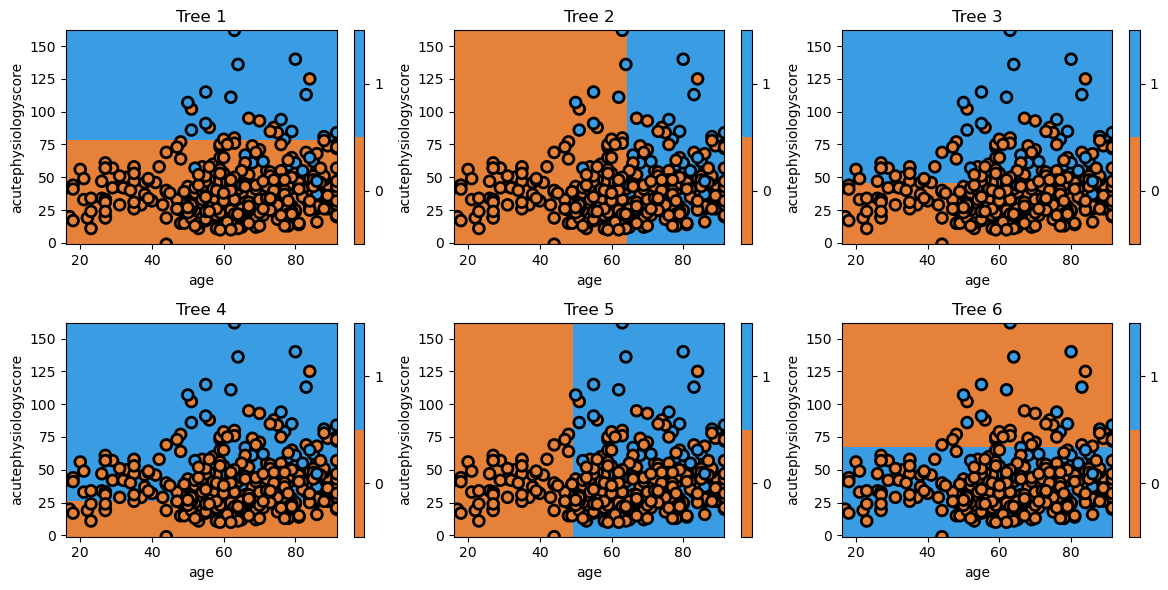

In [67]:
from sklearn import ensemble

# build models with a single split
clf = tree.DecisionTreeClassifier(max_depth=1)
mdl = ensemble.AdaBoostClassifier(base_estimator=clf,n_estimators=6)
mdl = mdl.fit(x_train.values, y_train.values)

# plot each individual decision tree
fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(mdl.estimators_):
    ax = fig.add_subplot(2,3,i+1)
    txt = 'Tree {}'.format(i+1)
    glowyr.plot_model_pred_2d(estimator, x_train, y_train, title=txt)

### Exercise

Does the first tree in the collection (the one in the top left) look familiar to you? Why?

We have seen the tree before. It is the very first tree that we built, which makes sense: it is using the entire dataset with no special weighting.

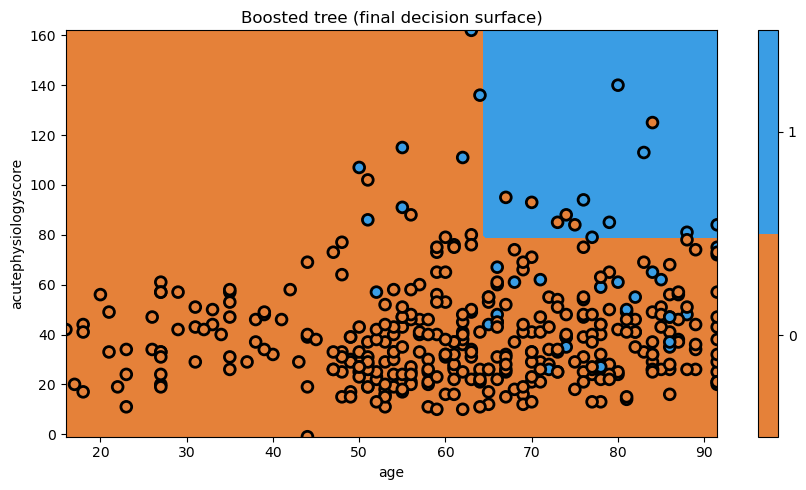

In [68]:
# plot the final prediction
plt.figure(figsize=[9,5])
txt = 'Boosted tree (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

## Bagging

### Bootstrap aggregation (“Bagging”)

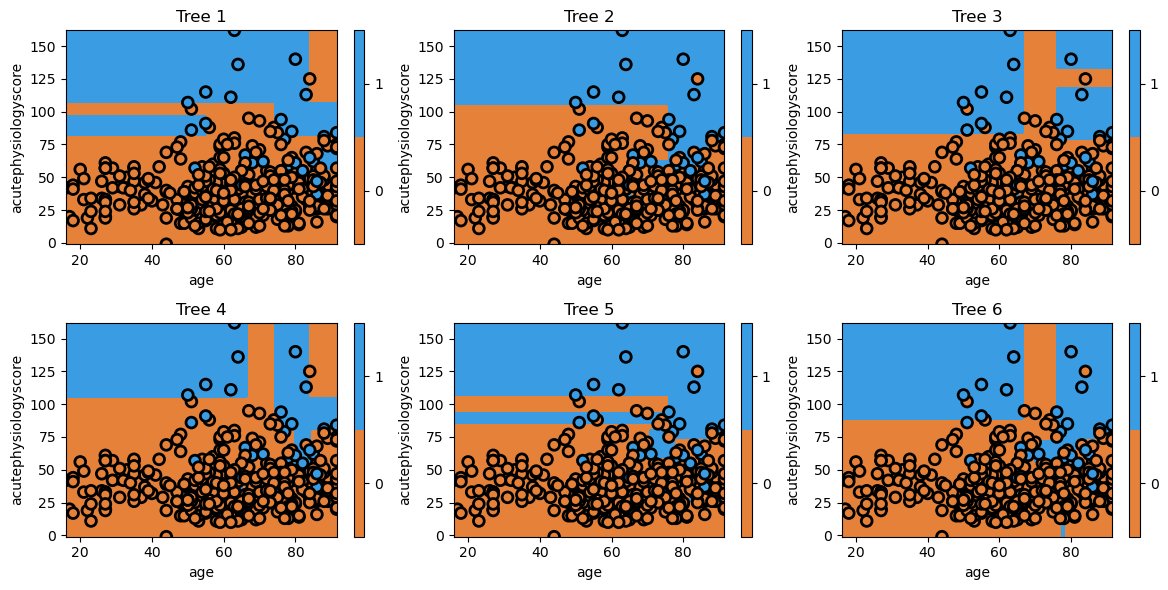

In [69]:
np.random.seed(321)
clf = tree.DecisionTreeClassifier(max_depth=5)
mdl = ensemble.BaggingClassifier(base_estimator=clf, n_estimators=6)
mdl = mdl.fit(x_train.values, y_train.values)

fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(mdl.estimators_):    
    ax = fig.add_subplot(2,3,i+1)
    txt = 'Tree {}'.format(i+1)
    glowyr.plot_model_pred_2d(estimator, x_train, y_train, title=txt)

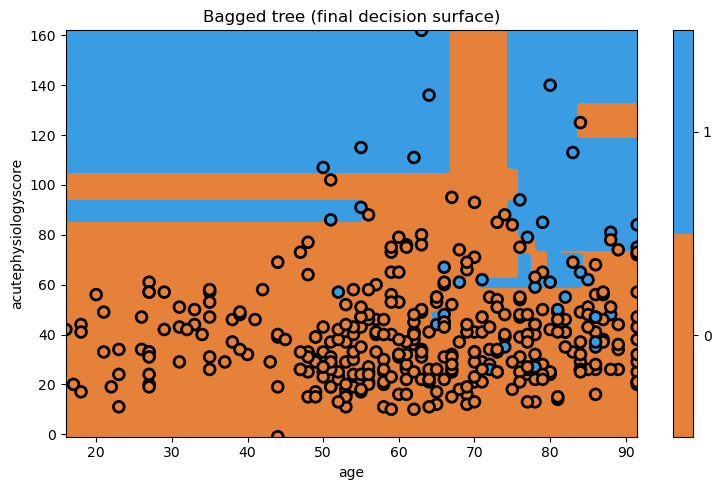

In [70]:
# plot the final prediction
plt.figure(figsize=[8,5])
txt = 'Bagged tree (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

## Random forest

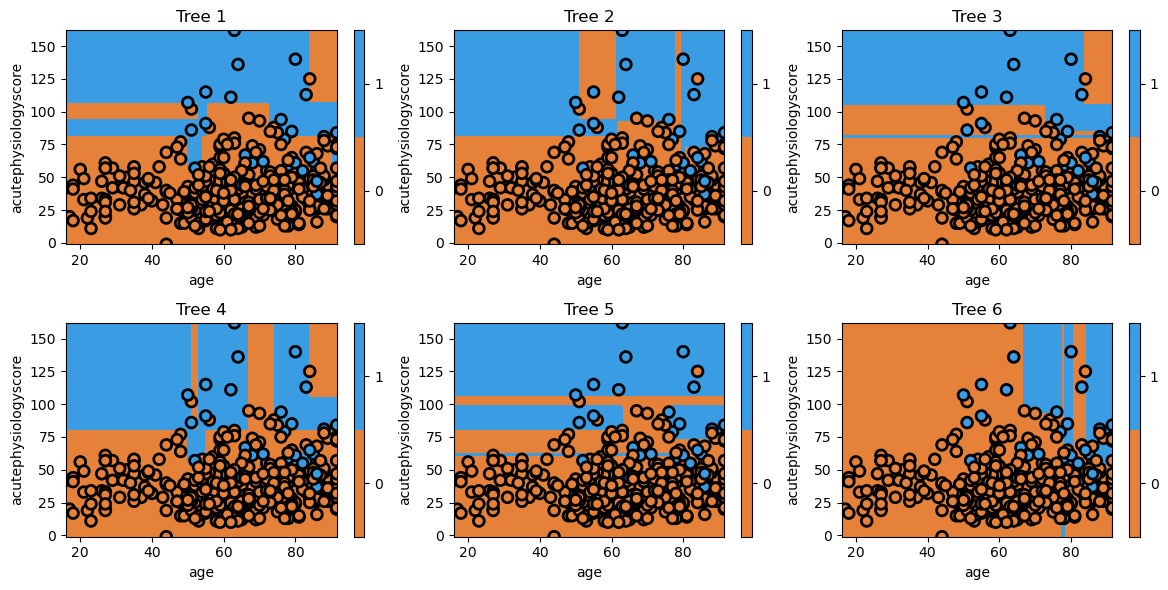

In [71]:
np.random.seed(321)
mdl = ensemble.RandomForestClassifier(max_depth=5, n_estimators=6, max_features=1)
mdl = mdl.fit(x_train.values, y_train.values)

fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(mdl.estimators_):    
    ax = fig.add_subplot(2,3,i+1)
    txt = 'Tree {}'.format(i+1)
    glowyr.plot_model_pred_2d(estimator, x_train, y_train, title=txt)

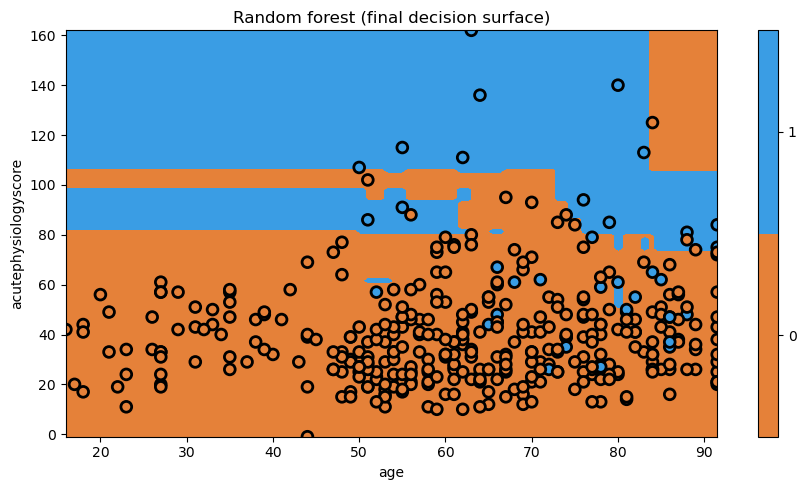

In [72]:
# final model decision surface
plt.figure(figsize=[9,5])
txt = 'Random forest (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

## Gradient boosting

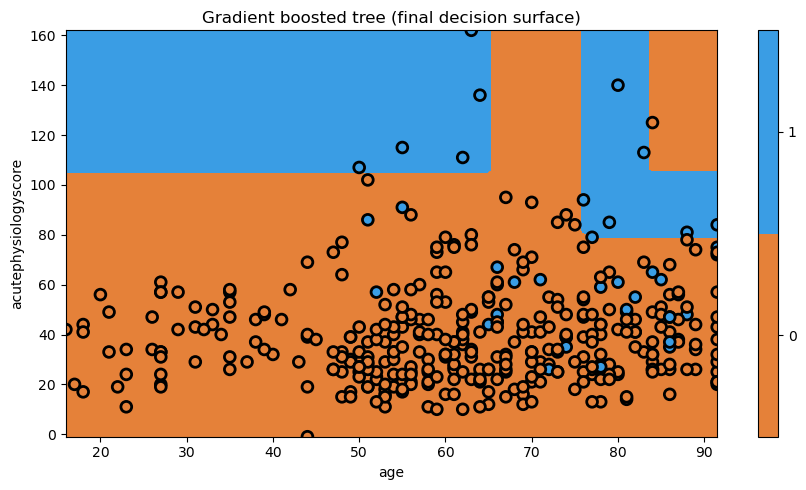

In [73]:
np.random.seed(321)
mdl = ensemble.GradientBoostingClassifier(n_estimators=10)
mdl = mdl.fit(x_train.values, y_train.values)

plt.figure(figsize=[9,5])
txt = 'Gradient boosted tree (final decision surface)'
glowyr.plot_model_pred_2d(mdl, x_train, y_train, title=txt)

## Performance

### Comparing model performance

AUROC	Model
0.701	Decision Tree
0.894	Gradient Boosting
0.850	Random Forest
0.769	Bagging
0.878	AdaBoost


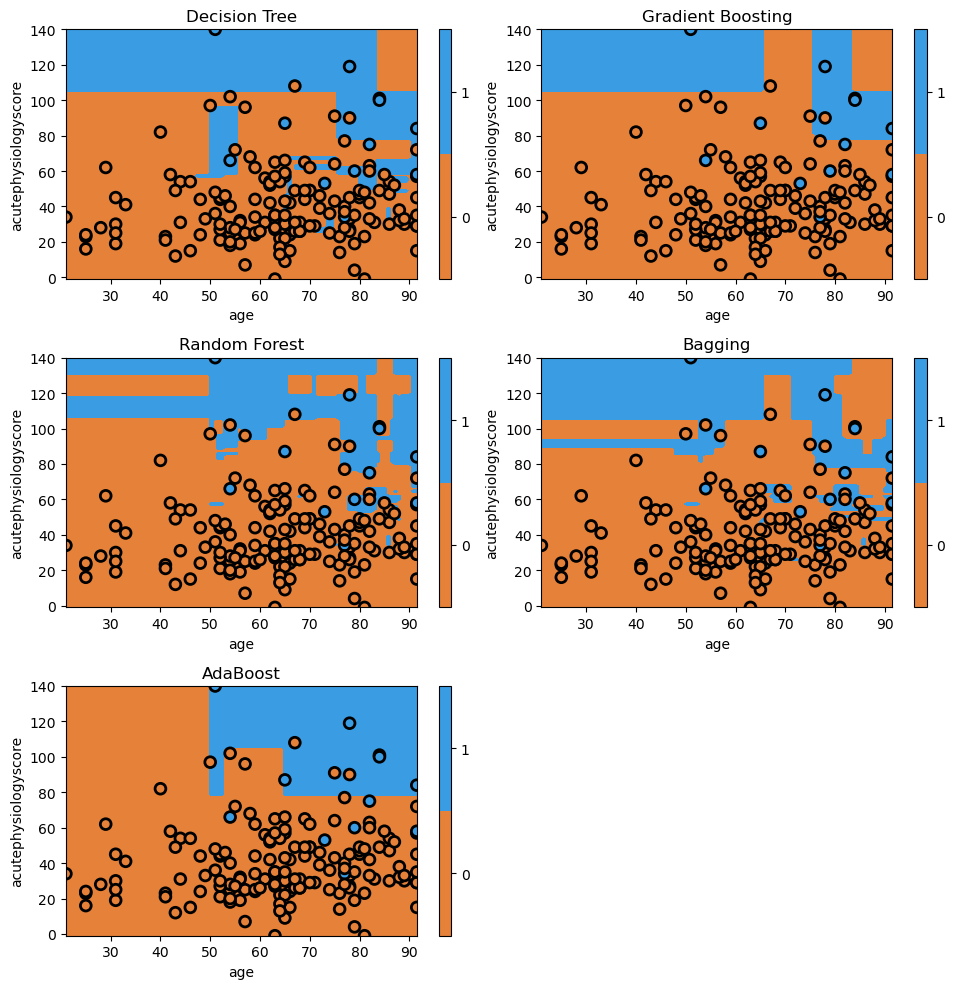

In [74]:
from sklearn import metrics

clf = dict()
clf['Decision Tree'] = tree.DecisionTreeClassifier(criterion='entropy', splitter='best').fit(x_train.values, y_train.values)
clf['Gradient Boosting'] = ensemble.GradientBoostingClassifier(n_estimators=10).fit(x_train.values, y_train.values)
clf['Random Forest'] = ensemble.RandomForestClassifier(n_estimators=10).fit(x_train.values, y_train.values)
clf['Bagging'] =  ensemble.BaggingClassifier(n_estimators=10).fit(x_train.values, y_train.values)
clf['AdaBoost'] =  ensemble.AdaBoostClassifier(n_estimators=10).fit(x_train.values, y_train.values)

fig = plt.figure(figsize=[10,10])

print('AUROC\tModel')
for i, curr_mdl in enumerate(clf):    
    yhat = clf[curr_mdl].predict_proba(x_test.values)[:,1]
    score = metrics.roc_auc_score(y_test, yhat)
    print('{:0.3f}\t{}'.format(score, curr_mdl))
    ax = fig.add_subplot(3,2,i+1)
    glowyr. plot_model_pred_2d(clf[curr_mdl], x_test, y_test, title=curr_mdl)


# Suggested changes

* Deploy into the same directory for the courses
* All should probably use the `data` 